In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm, ks_2samp
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib import rc, cm
rc('axes',linewidth=1.4)

In [2]:
from Constants import *
import Preprocessing as pp
import Plot

In [3]:
from importlib import reload 

In [4]:
# This notebook needs to be in a folder organized as follows
# - root
#     - MT3.ipynb
#     - {SETUP}
#         - PULLX
#             - {RNAME}
#                 - {something1}-{something2}-ASX_PULL_pullx.xvg
#                 - {something3}-{something4}-ASX_PULL_pullx.xvg
#                 - ...
#         - PULLF
#             - {RNAME}
#                 - {something1}-{something2}-ASX_PULL_pullf.xvg
#                 - {something3}-{something4}-ASX_PULL_pullf.xvg
#                 - ...
#         - DANGS [this is not necessary but the code will crash if it doesn't exist]
#            - {RNAME}
#                 - {something1}-{something2}-ASX_PULL_dang.sfu
#                 - {something3}-{something4}-ASX_PULL_dang.sfu
#                 - ...
# *dang.sfu are text files with 20 columns. Each row is one frame in the trajectory. 
# The first 10 columns are the distances between the COM of each analyte and the gold core. 
# The other 10 columns are the angles between 2 vectors: (i) Vector from the COM of the gold core to the COM of the analyte, and (ii) molecular axis of the analyte
RNAME = 'MT3'  # Analyte residue name. There must be a folder with this name containing the *pullx.xvg and *pullf.xvg files of all the Gromacs steered simulations 
SETUP = "S36"  # describes the parameters of the MD runs. The best setup so far (and I think the only one for which data still exists) is S36.

# Pulling/PMF

In [10]:
reload(pp)
# Load all the information from the steering MD
MT3_PMF = pp.Catecholamine_PMF(rname=RNAME, setup=SETUP)
# Changes sign of binding free energy to rank according to absolute value
MT3_PMF.data.dgs = MT3_PMF.data.dgs.apply(lambda x: -1*np.array(x))
MT3_PMF.data = pp.rank_metric('dg', MT3_PMF.data)  # higher rank means stronger binding (unlike in Mixtures, so beware)
# Change back the sign
MT3_PMF.data.dgs = MT3_PMF.data.dgs.apply(lambda x: -1*np.array(x)) # note that dgs is stored with a negative sign (unlike in Mixtures, so beware)

ALA-ALA
ALA-GLN
ALA-GLY
ALA-ILE
ALA-LEU
ALA-PHE
ALA-PRO
ALA-SER
ALA-TRP
ALA-TYR
GLN-ALA
GLN-GLN
GLN-GLY
GLN-ILE
GLN-LEU
GLN-PHE
GLN-PRO
GLN-SER
GLN-TRP
GLN-TYR
GLY-ALA
GLY-GLN
GLY-GLY
GLY-ILE
GLY-LEU
GLY-PHE
GLY-PRO
GLY-SER
GLY-TRP
GLY-TYR
ILE-ALA
ILE-GLN
ILE-GLY
ILE-ILE
ILE-LEU
ILE-PHE
ILE-PRO
ILE-SER
ILE-TRP
ILE-TYR
LEU-ALA
LEU-GLN
LEU-GLY
LEU-ILE
LEU-LEU
LEU-PHE
LEU-PRO
LEU-SER
LEU-TRP
LEU-TYR
PHE-ALA
PHE-GLN
PHE-GLY
PHE-ILE
PHE-LEU
PHE-PHE
PHE-PRO
PHE-SER
PHE-TRP
PHE-TYR
PRO-ALA
PRO-GLN
PRO-GLY
PRO-ILE
PRO-LEU
PRO-PHE
PRO-PRO
PRO-SER
PRO-TRP
PRO-TYR
SER-ALA
SER-GLN
SER-GLY
SER-ILE
SER-LEU
SER-PHE
SER-PRO
SER-SER
SER-TRP
SER-TYR
TRP-ALA
TRP-GLN
TRP-GLY
TRP-ILE
TRP-LEU
TRP-PHE
TRP-PRO
TRP-SER
TRP-TRP
TRP-TYR
TYR-ALA
TYR-GLN
TYR-GLY
TYR-ILE
TYR-LEU
TYR-PHE
TYR-PRO
TYR-SER
TYR-TRP
TYR-TYR


In [11]:
MT3_PMF.data

aa1  aa2                                                dgs    dg_mean  \
0   ALA  ALA  [-6.961015379808295, -20.80820278339786, -7.67...  -7.269896   
1   ALA  GLN  [-14.921900614084443, -9.921202621037615, -23....  -8.933757   
2   ALA  GLY  [-12.625892346135661, -21.57426932837378, -18....  -8.596965   
3   ALA  ILE  [-10.666534053672883, -15.712165531861869, -15... -10.711082   
4   ALA  LEU  [-19.332220902217873, -11.277302368998544, -13...  -9.954647   
..  ...  ...                                                ...        ...   
95  TYR  PHE  [-26.660597996963265, -11.472591427630132, -10... -10.100208   
96  TYR  PRO  [-29.108257514605945, -15.469515905105629, -33...  -8.867170   
97  TYR  SER  [-16.211104720272477, -11.270826340398893, -11...  -8.353372   
98  TYR  TRP  [-5.0732931016181695, -19.59682064316057, -24....  -5.080521   
99  TYR  TYR  [-15.95803646296802, -7.695469196384433, -23.2...  -7.800439   

      dg_std       psc  dg_rank      menos        mas  dg_rank_std_up  \
0   0.466849  0.860963       37  -7.736746  -6.803047              18   
1   0.513326  0.748663       56  -9.447083  -8.420431              11   
2   0.572138  0.895722       53  -9.169102  -8.024827              11   
3   0.375555  0.716578       80 -11.086637 -10.335527              11   
4   0.596626  0.922460       69 -10.551273  -9.358021              13   
..       ...       ...      ...        ...        ...             ...   
95  0.307111  0.997326       72 -10.407319  -9.793096              11   
96  0.135007  0.754011       54  -9.002177  -8.732162               7   
97  0.504067  0.855615       48  -8.857439  -7.849305               7   
98  0.176300  0.639037        4  -5.256821  -4.904221               0   
99  0.328072  1.000000       43  -8.128511  -7.472366              10   

    dg_rank_std_down  
0                  8  
1                 12  
2                 11  
3                  5  
4                 12  
..               ...  
95                 9  
96                10  
97                12  
98                 2  
99                10  

[100 rows x 11 columns]

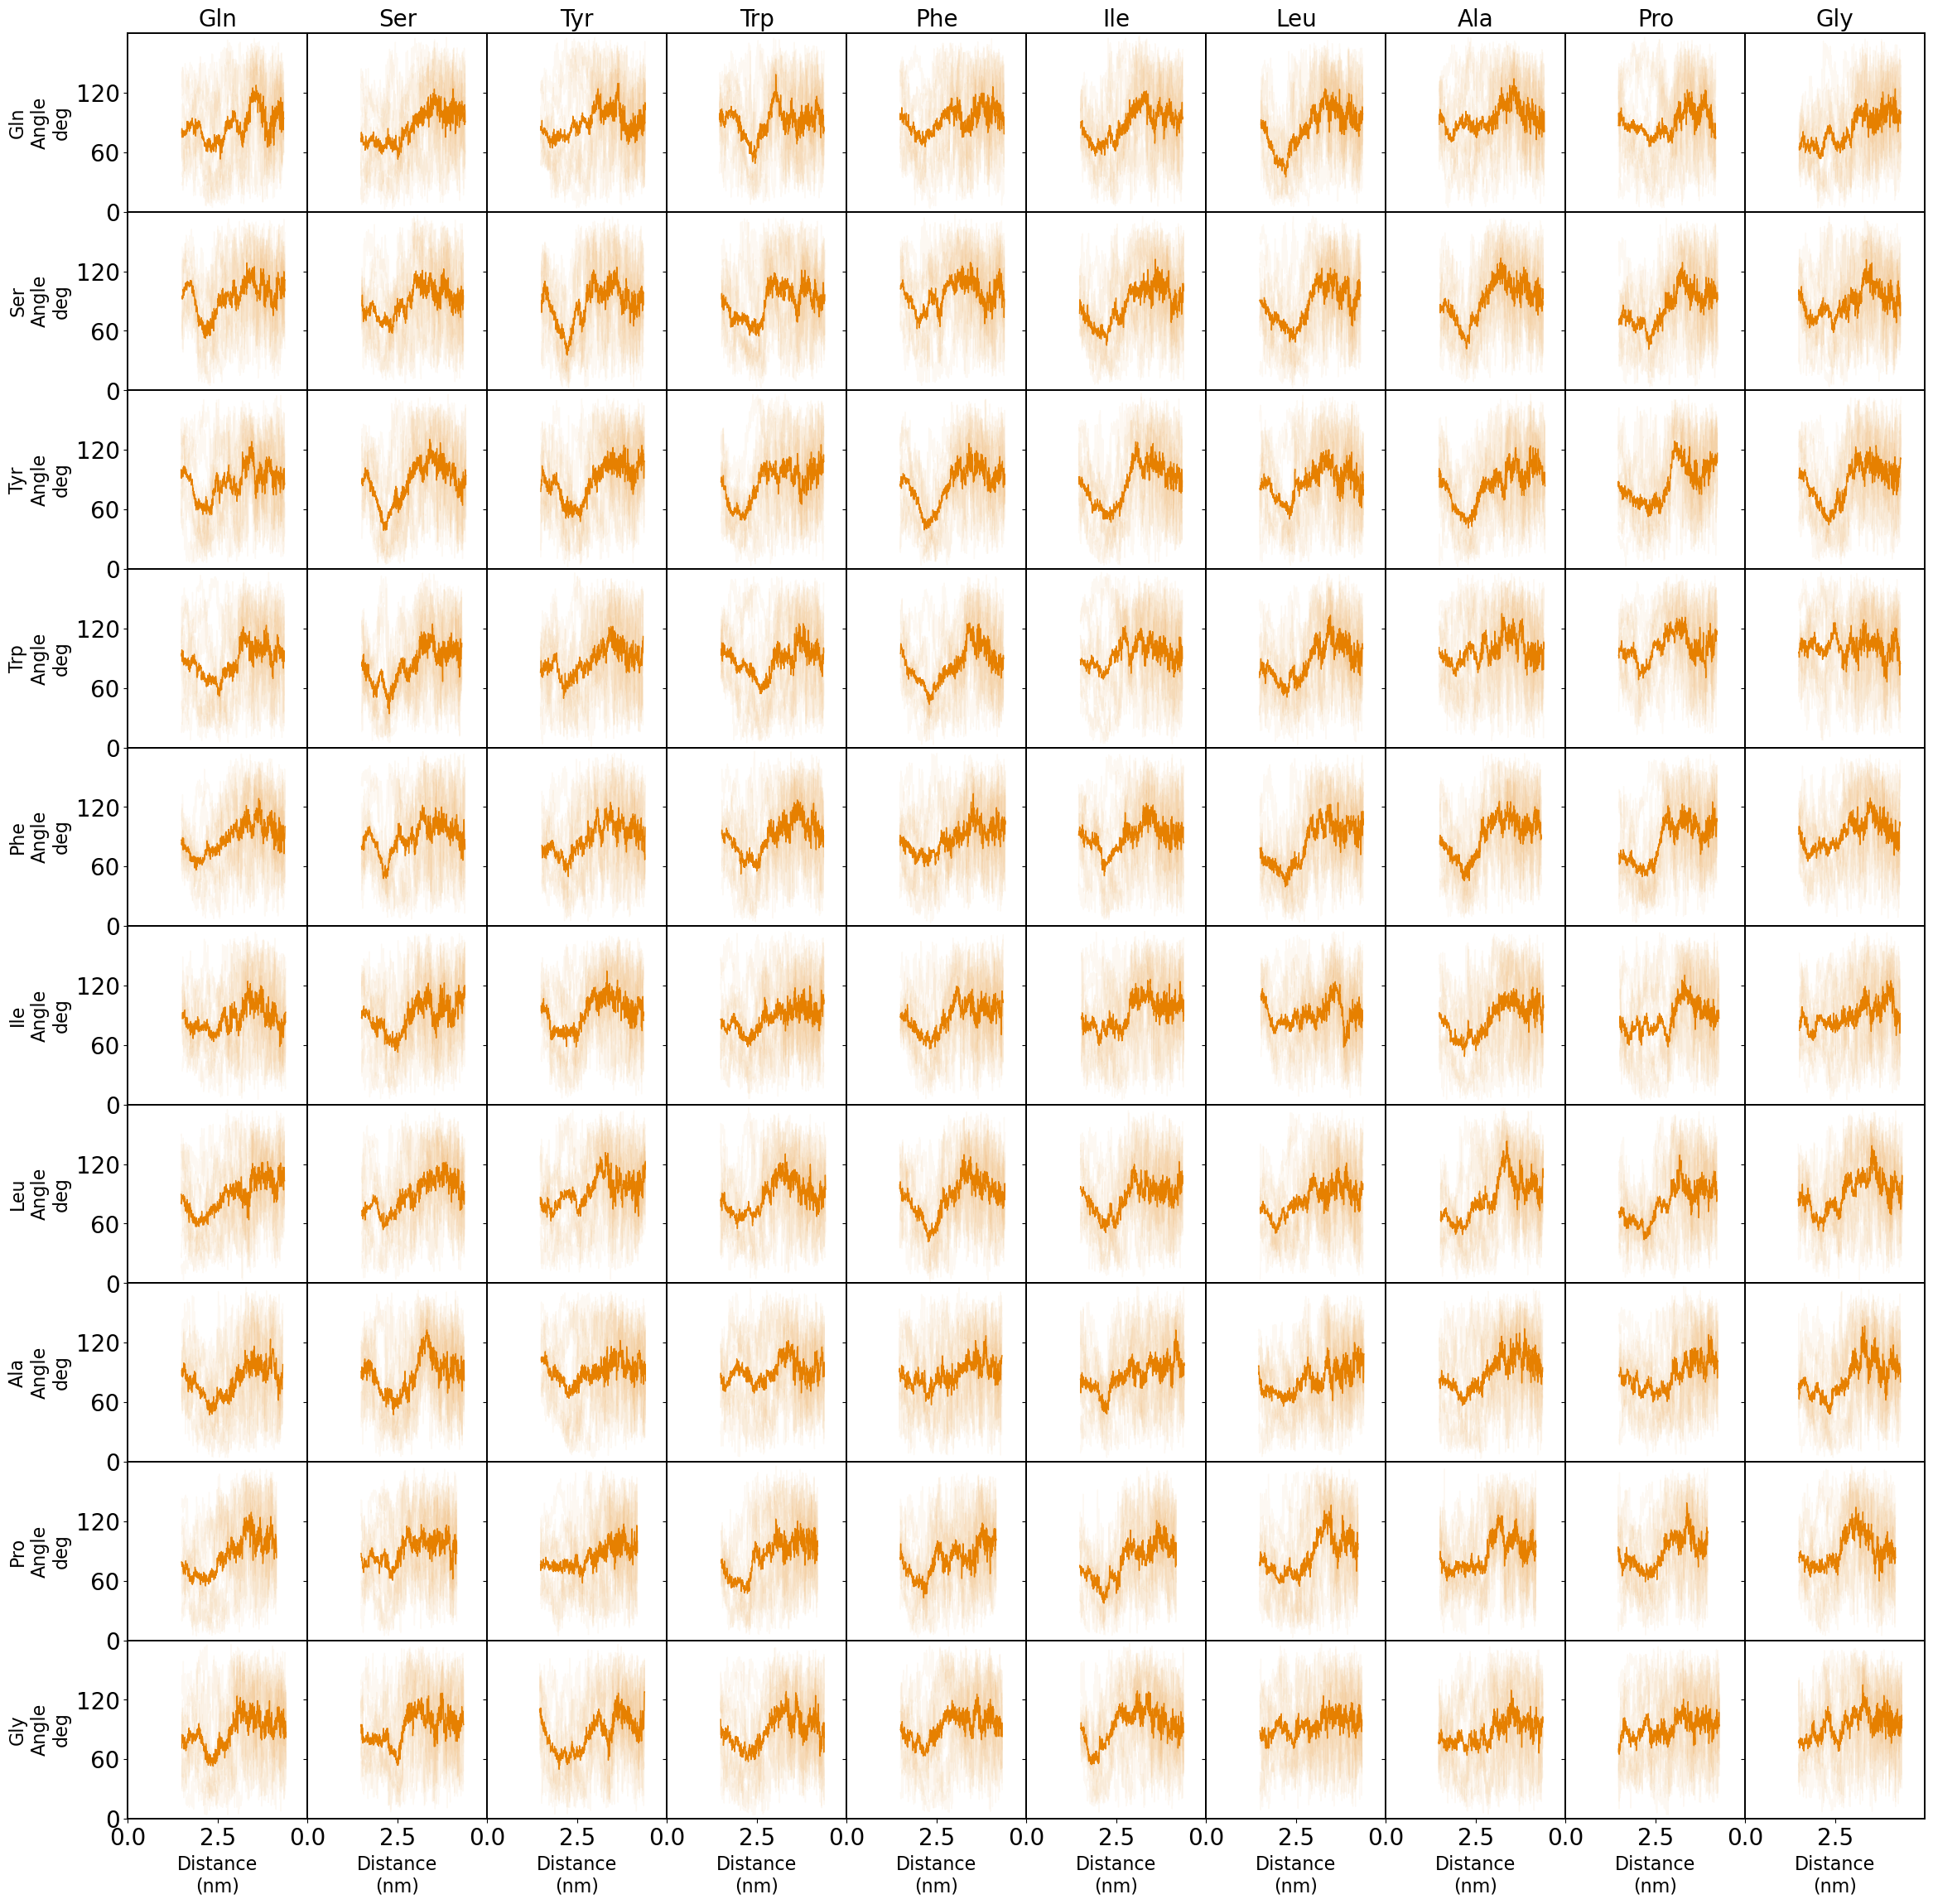

In [12]:
# The original idea was to explore if MT3 has a preferred orientation when it binds to the NPs. Hard to tell with these many plots, but could be insightful later on
Plot.plot_all_angs(MT3_PMF)

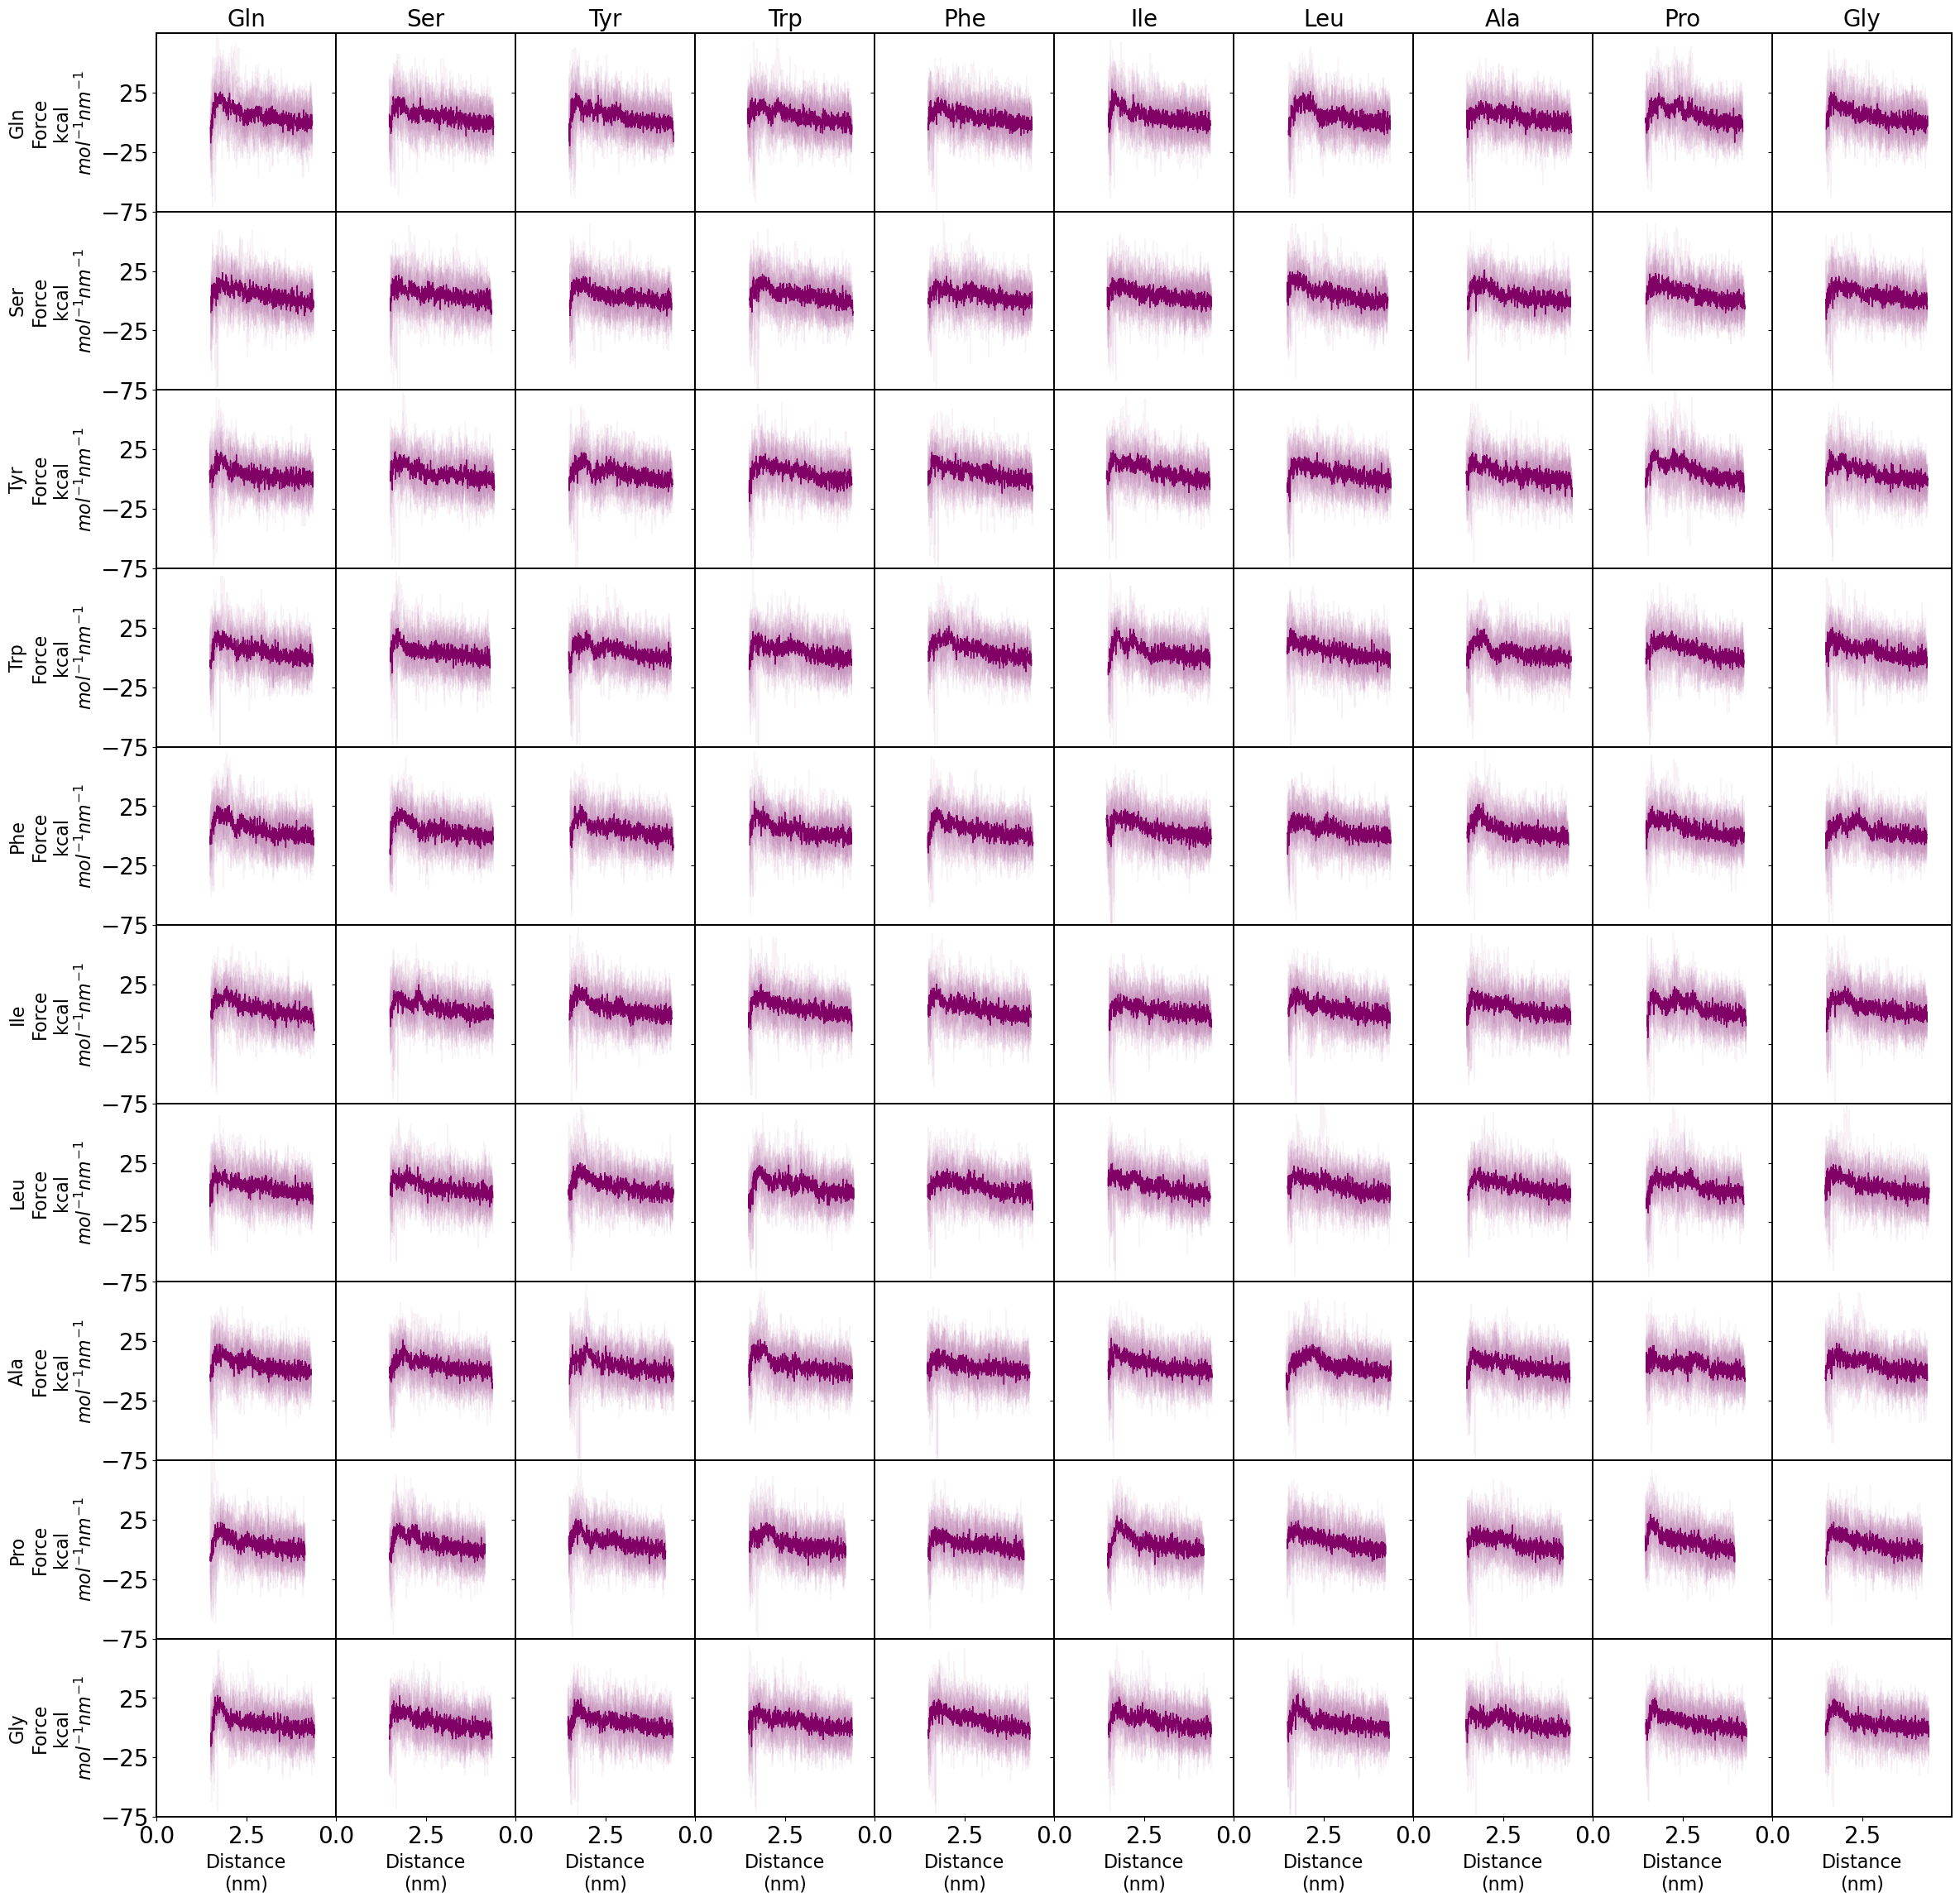

In [13]:
Plot.plot_all_forces(MT3_PMF)

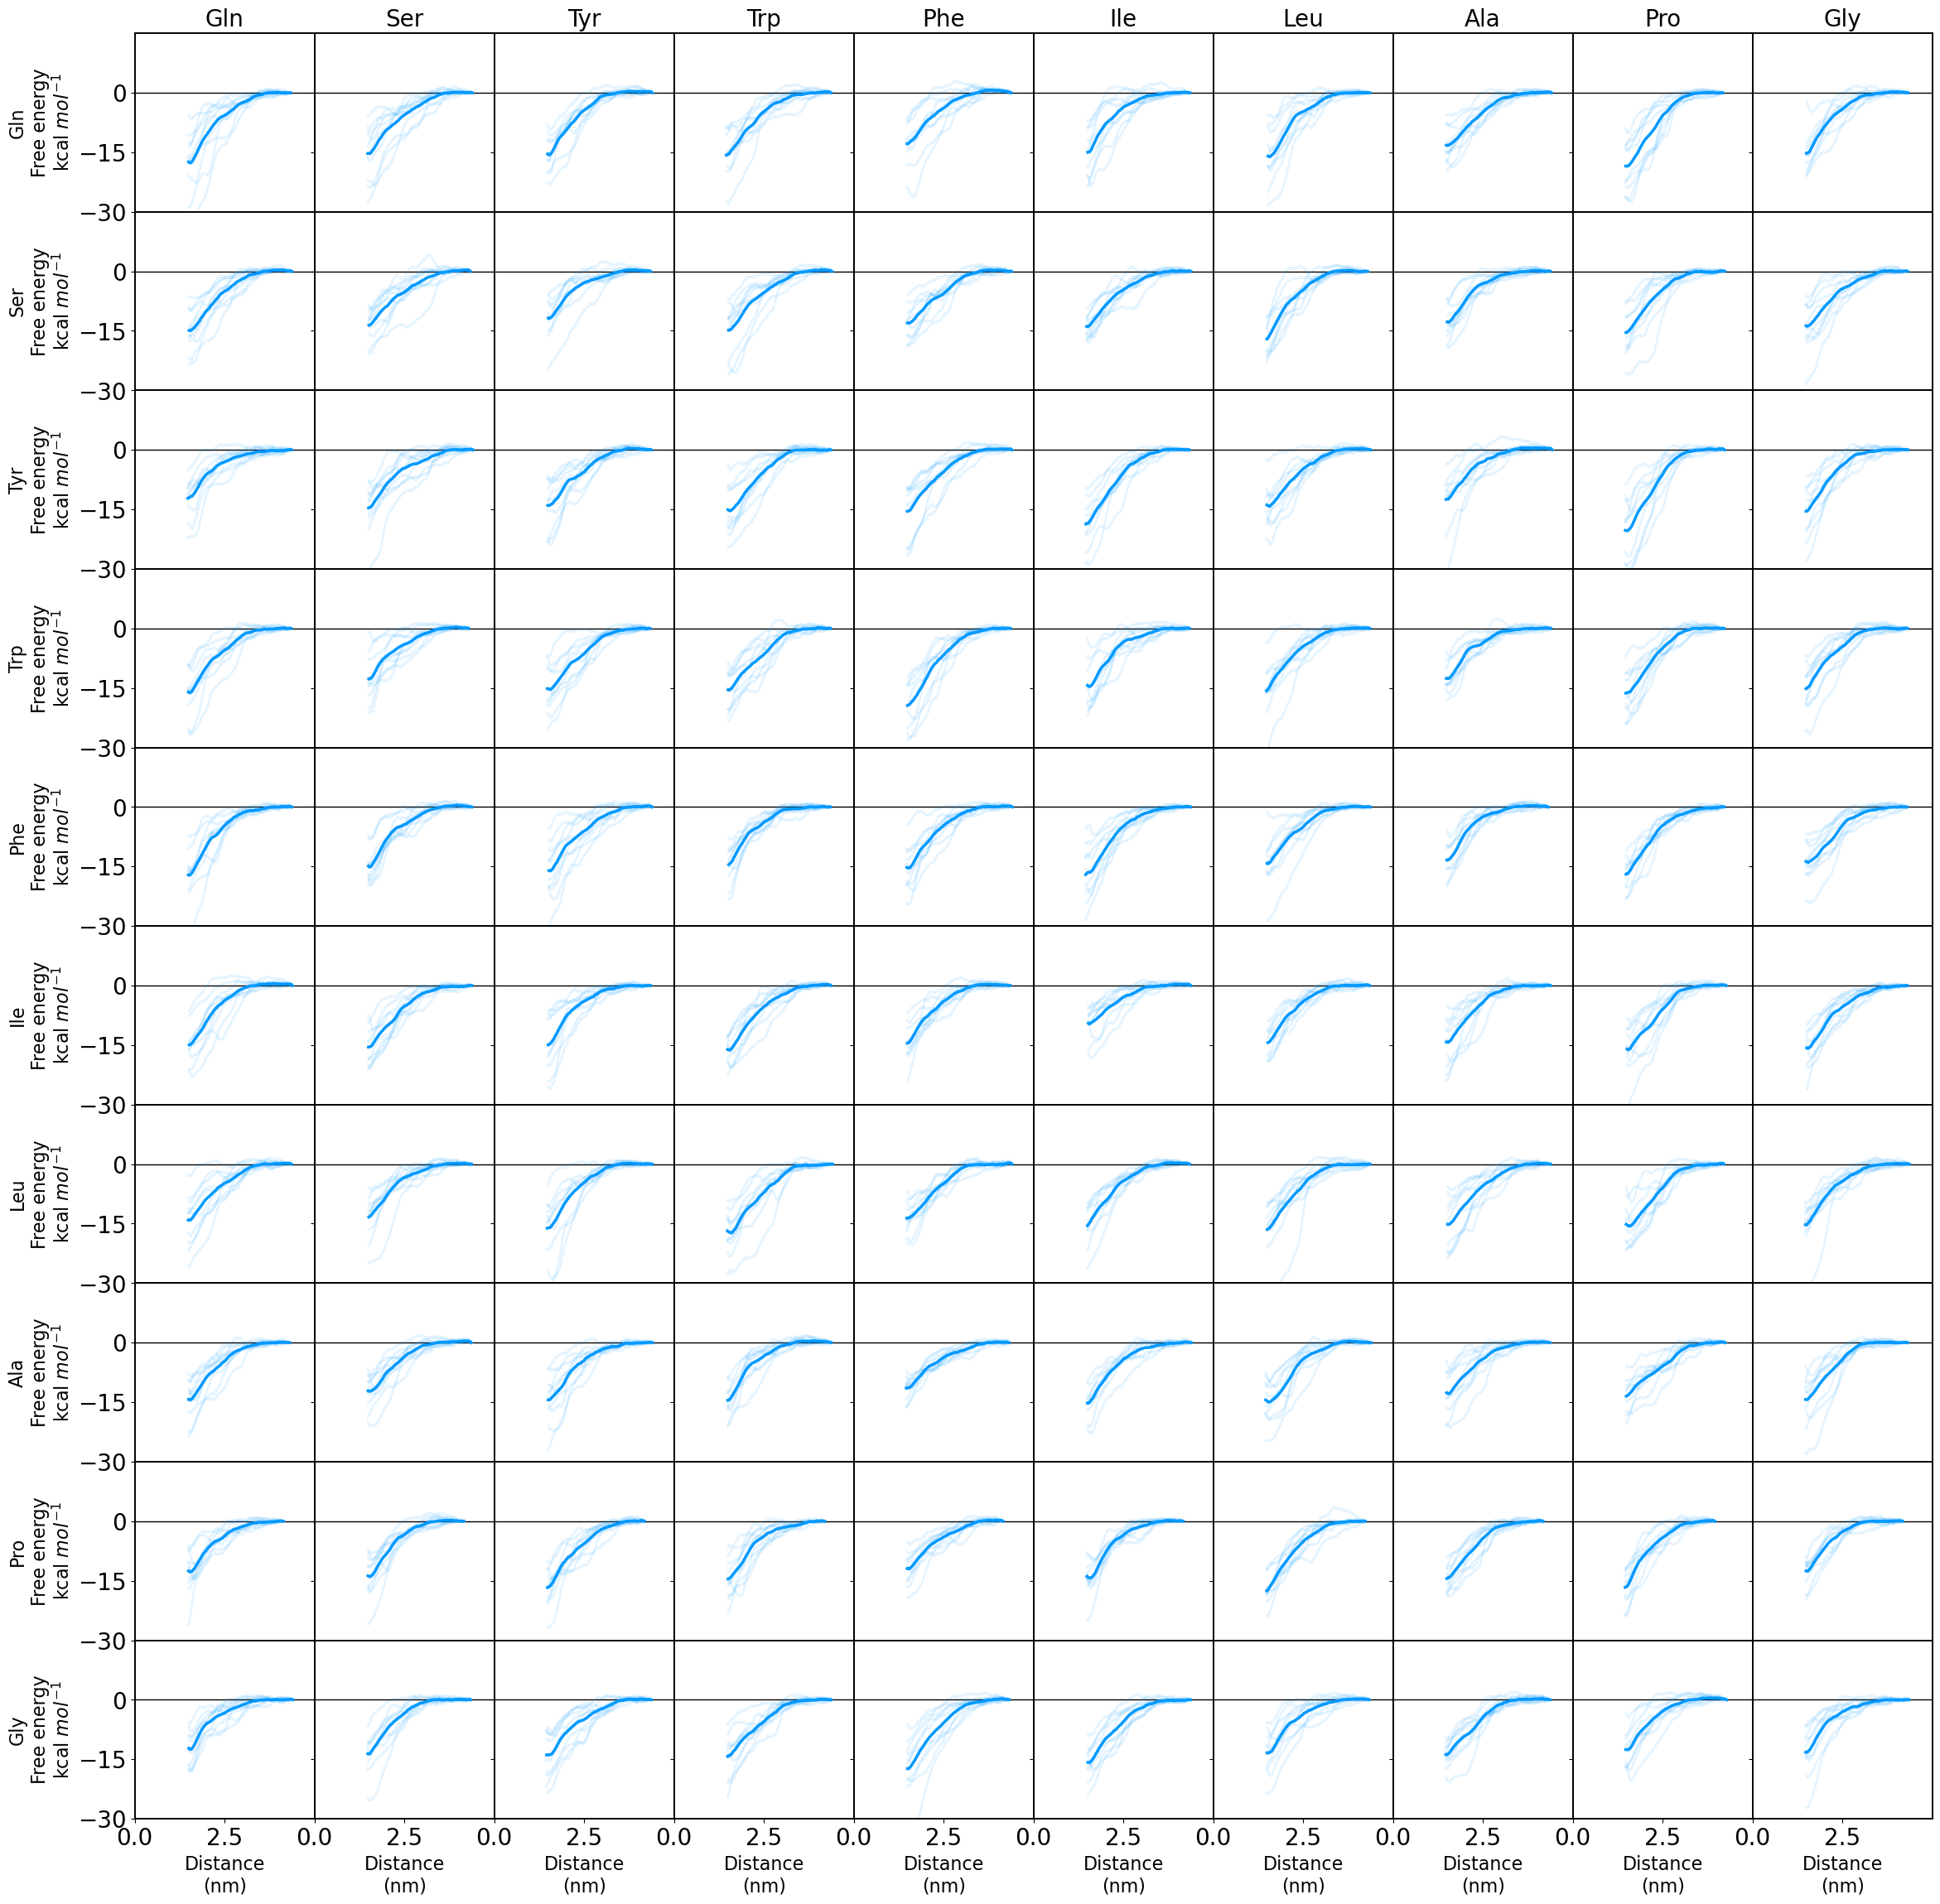

In [14]:
Plot.plot_all_dgs(MT3_PMF)

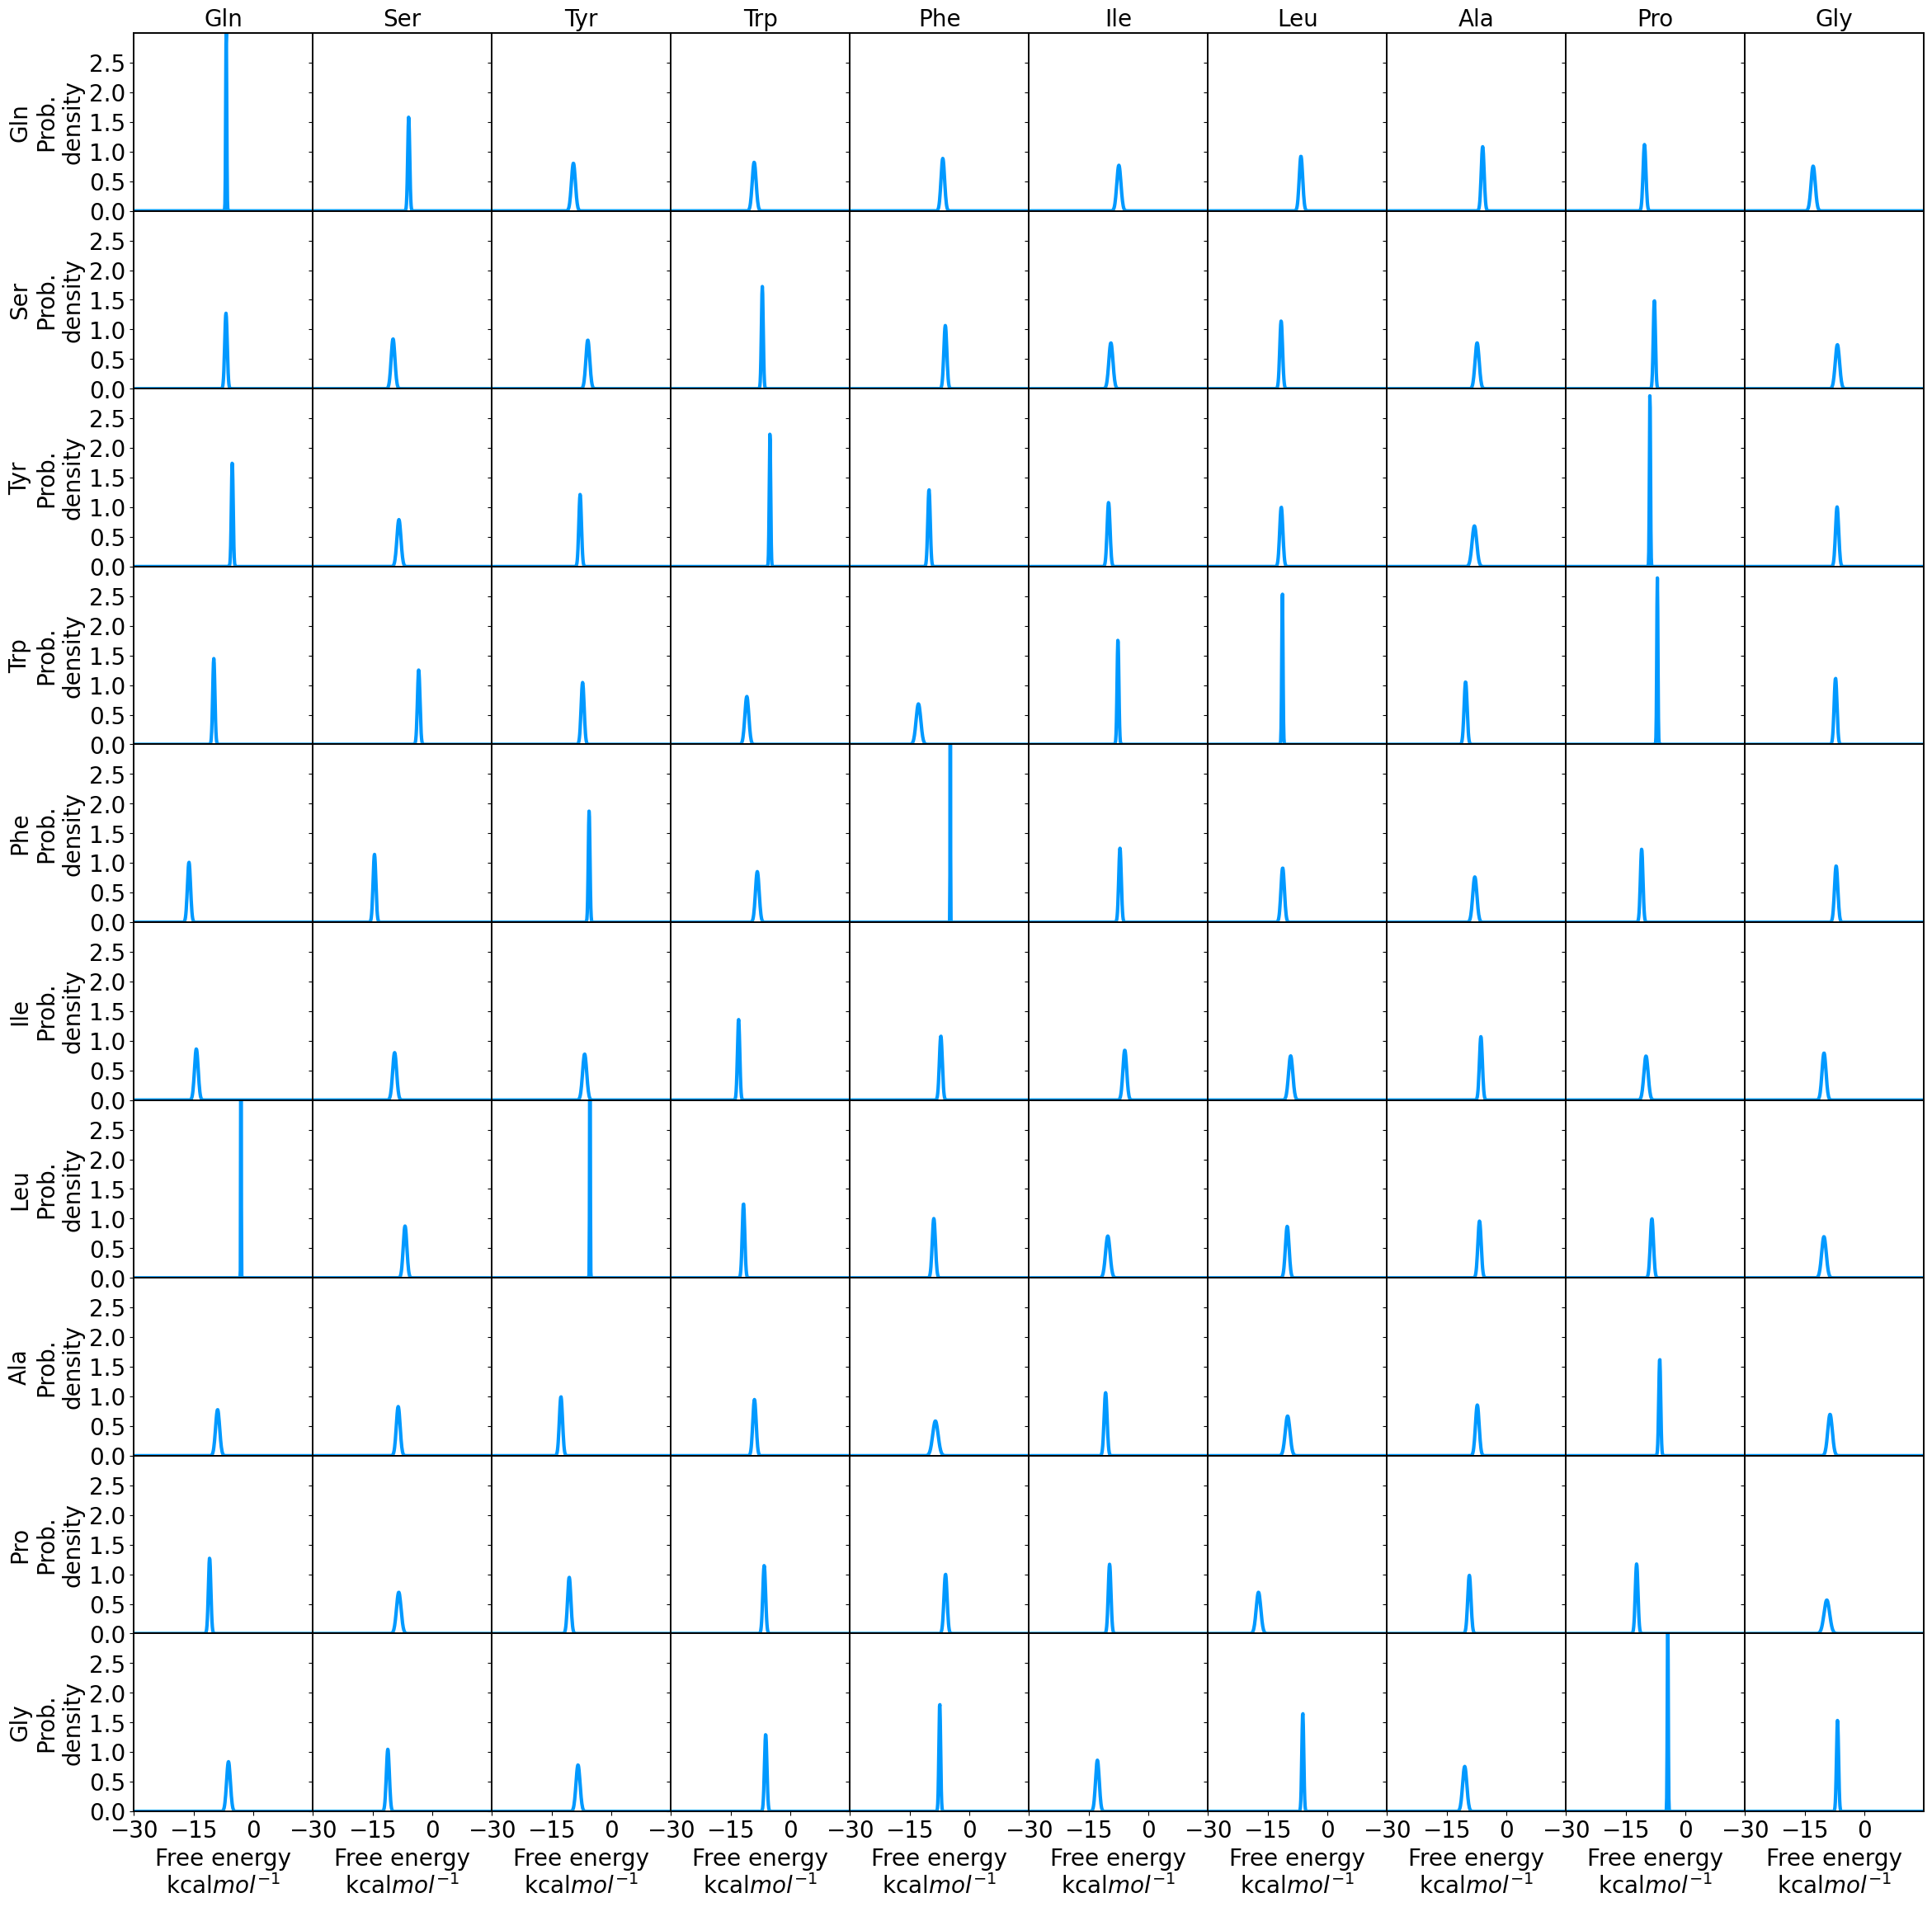

In [15]:
Plot.plot_dg_distributions(MT3_PMF)

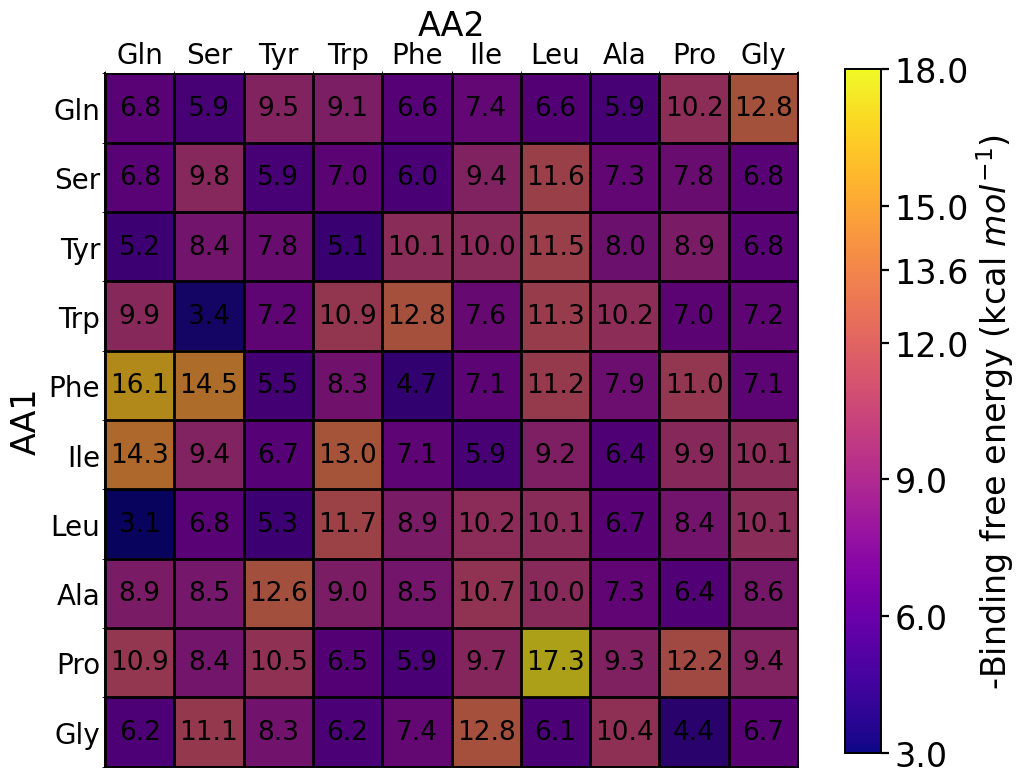

In [16]:
Plot.plot_dg_map(MT3_PMF, show_mean=True, show_std=False, svg=False)
#plot_dg_map(MT3_PMF, show_mean=True, show_std=False)

In [17]:
print(np.sum(MT3_PMF.data.dg_mean<-12.6))

9


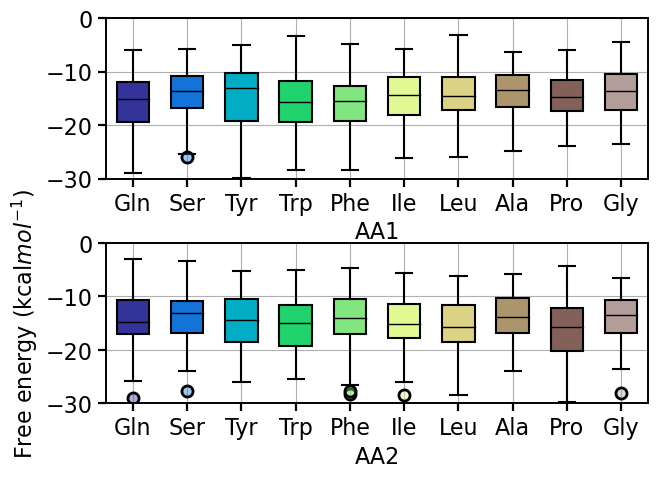

In [18]:
Plot.plot_aa_dependence(MT3_PMF)

In [19]:
MT3_PMF.data

aa1  aa2                                                dgs    dg_mean  \
0   ALA  ALA  [-6.961015379808295, -20.80820278339786, -7.67...  -7.269896   
1   ALA  GLN  [-14.921900614084443, -9.921202621037615, -23....  -8.933757   
2   ALA  GLY  [-12.625892346135661, -21.57426932837378, -18....  -8.596965   
3   ALA  ILE  [-10.666534053672883, -15.712165531861869, -15... -10.711082   
4   ALA  LEU  [-19.332220902217873, -11.277302368998544, -13...  -9.954647   
..  ...  ...                                                ...        ...   
95  TYR  PHE  [-26.660597996963265, -11.472591427630132, -10... -10.100208   
96  TYR  PRO  [-29.108257514605945, -15.469515905105629, -33...  -8.867170   
97  TYR  SER  [-16.211104720272477, -11.270826340398893, -11...  -8.353372   
98  TYR  TRP  [-5.0732931016181695, -19.59682064316057, -24....  -5.080521   
99  TYR  TYR  [-15.95803646296802, -7.695469196384433, -23.2...  -7.800439   

      dg_std       psc  dg_rank      menos        mas  dg_rank_std_up  \
0   0.466849  0.860963       37  -7.736746  -6.803047              18   
1   0.513326  0.748663       56  -9.447083  -8.420431              11   
2   0.572138  0.895722       53  -9.169102  -8.024827              11   
3   0.375555  0.716578       80 -11.086637 -10.335527              11   
4   0.596626  0.922460       69 -10.551273  -9.358021              13   
..       ...       ...      ...        ...        ...             ...   
95  0.307111  0.997326       72 -10.407319  -9.793096              11   
96  0.135007  0.754011       54  -9.002177  -8.732162               7   
97  0.504067  0.855615       48  -8.857439  -7.849305               7   
98  0.176300  0.639037        4  -5.256821  -4.904221               0   
99  0.328072  1.000000       43  -8.128511  -7.472366              10   

    dg_rank_std_down  
0                  8  
1                 12  
2                 11  
3                  5  
4                 12  
..               ...  
95                 9  
96                10  
97                12  
98                 2  
99                10  

[100 rows x 11 columns]

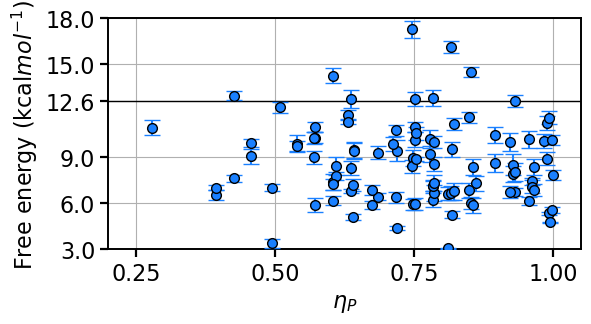

In [20]:
def plot_similarity(cath):
    """
    cath is a Catecholamine_PMF object (see Preprocessing.py)
    
    Plots the computed binding free energy against the protein similarity index for each dyad
    """
    Z = 16
    
    tmp_df = cath.data.copy()
    aa_upper = [aa.upper() for aa in AA_ordered]
    fig, ax = plt.subplots(figsize=(6.1,3), ncols=1, nrows=1, gridspec_kw={'hspace':0.4})
    ax.axhline(12.6,c='k', lw=1)
    for eta, gs, gm, ge in zip(cath.data.psc, cath.data.dgs, cath.data.dg_mean, cath.data.dg_std):
        #ax.errorbar([eta]*len(gs), gs, fmt='o', color=(0.6,0.9,1.0, 1), mew=0., mec='k', zorder=1, ms=5)
        ax.errorbar([eta], [-1*gm], yerr=[ge], fmt='o', color=(0.1,0.5,1.0, 1), mew=1, mec='k', zorder=200, ms=7, capsize=6)
        
    #colors = cm.terrain(np.linspace(0,0.85,len(AA_ordered)))
    #for ama, c in zip(aa_upper, colors):
        #mask = tmp_df['aa2']==ama
        #entry = tmp_df.loc[mask,:]
        #for i, pt in entry.iterrows():
            #ax.errorbar([pt.psc], [-1*pt.dg_mean], yerr=[pt.dg_std], fmt='o', color=c, mew=1, mec='k', zorder=200, ms=7, capsize=6)
    ax.set_ylim(3,18)
    ax.set_xlim(0.2,1.05)
    ax.set_xticks([0.25,0.5,0.75,1])
    #ax.set_xticklabels(AA_ordered, fontsize=Z)
    ax.set_yticks([3,6,9,12.6,15,18])
    ax.set_xlabel(r"$\eta_P$", fontsize=Z)
    ax.set_ylabel("Free energy (kcal"+r"$mol^{-1}$)", fontsize=Z)
    ax.tick_params(labelsize=Z, size=6, width=1.6)
    ax.grid()
    plt.savefig("{}/Plots/{}/psc.svg".format(cath.setup, cath.rname), format='svg', bbox_inches='tight')
    # svg2emf("Plots/{}/psc.svg".format(cath.rname))
    plt.savefig("{}/Plots/{}/psc.png".format(cath.setup, cath.rname), format='png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
plot_similarity(MT3_PMF)

In [24]:
max(MT3_PMF.data.dg_mean)

-3.0542391468667596

In [25]:
# Exports ranked list to file
toexport = MT3_PMF.data[['aa1','aa2','dg_mean','dg_std','psc']].round(2).sort_values('dg_mean', ascending=True)
toexport.aa1 = toexport.aa1.apply(lambda k: k[0]+k[1:].lower())
toexport.aa2 = toexport.aa2.apply(lambda k: k[0]+k[1:].lower())
AA_lower = [aa[0] + aa[1:].lower() for aa in AA_ordered]
toexport = toexport.loc[toexport.aa1.isin(AA_lower) & toexport.aa2.isin(AA_lower)]
toexport.to_csv(f"{SETUP}/Candidates.csv".format(RNAME), index=False)